### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [552]:
your_name = "Joey Tran"
your_student_id = "46969977"

In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [554]:
df = pd.read_csv('The E-commerce Dataset.csv')

In [555]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [556]:
#counting number of Null values in each column
df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [557]:
print('the length before removing missing data is', len(df))

the length before removing missing data is 20000


In [558]:
#removing the columns which has review as 'none'
df_clean1 = df.drop(df.index[df["review"] == "none"])
print('the length after removing missing data is',(len(df_clean1)))

the length after removing missing data is 19982


In [559]:
df_clean = df.dropna()
print('the length after removing "N/A" data is', len(df_clean))

the length after removing "N/A" data is 19934


In [560]:
df_clean1.shape

(19982, 11)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [561]:
#Q2.1
uniq_users = df_clean1['userId'].unique()
print('Total number of unique users:', len(uniq_users))

uniq_reviews = df_clean1['review'].unique()
print('Total number of unique reviews:', len(uniq_reviews))

uniq_items = df_clean1['item'].unique()
print('Total number of unique items:', len(uniq_items))

uniq_cat = df_clean1['category'].unique()
print('Total number of unique categories:', len(uniq_cat))

Total number of unique users: 8577
Total number of unique reviews: 19523
Total number of unique items: 89
Total number of unique categories: 9


In [562]:
#Q2.2
df_clean1['rating'].describe()

count    19965.000000
mean         3.702229
std          1.404524
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [563]:
#Q2.3
df_clean1.groupby('gender')['item_id'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,9813.0,41.450627,27.270858,0.0,17.0,41.0,65.0,88.0
M,10142.0,42.114770,27.283062,0.0,18.0,41.0,66.0,88.0


In [564]:
#Q2.3
df_gender_group = df_clean1.groupby(['gender'])['rating'].count().reset_index(name = 'count')
df_gender_group['count'].describe()

count        2.000000
mean      9969.000000
std        234.759451
min       9803.000000
25%       9886.000000
50%       9969.000000
75%      10052.000000
max      10135.000000
Name: count, dtype: float64

In [565]:
#Q2.4
df_item_group = df_clean1.groupby(['item'])['rating'].count().reset_index(name = 'count')
df_item_group['count'].describe()

count     89.000000
mean     224.325843
std      116.651849
min      140.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      942.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

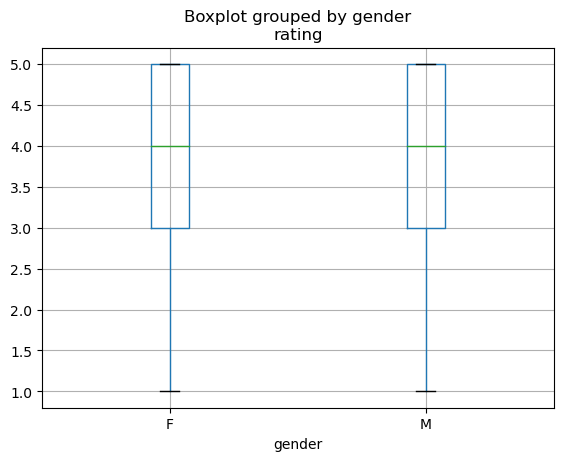

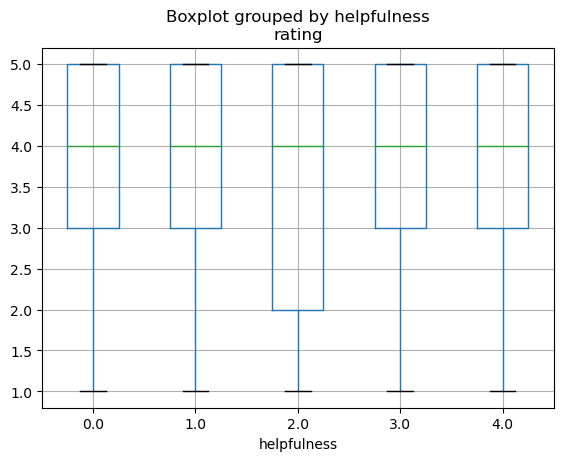

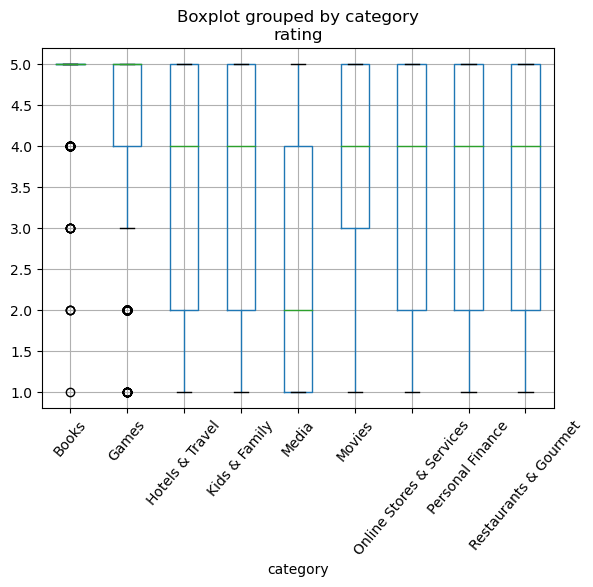

In [566]:
#gender-rating correlation
df_clean1.boxplot('rating', by='gender')
plt.show()
#helfulness-rating correlation
df_clean1.boxplot('rating', by='helpfulness')
plt.show()
#category-rating correlation
df_clean1.boxplot('rating', by='category')
plt.xticks(rotation=50)
plt.show()

Overall, the rating distribution shows us that the plots provide insights into the distribution of ratings across genders, helpfulness levels, and categories. They allow for a visual comparison of rating distributions and help identify any patterns or trends in the data. By exploring these visualizations, we can gain a better understanding of how gender, helpfulness, and category relate to ratings in the e-commerce dataset.

Gender-Rating: When we look at the box plot we can clearly see that that both females and males have the same amount of ratings ranging from 3-5 and having the median of 4

Helpfulness-Rating: As for this box plot, almost the same as the gender-rating but except for 2.0 helplessness the lower-quartile Q1 starts at 2 rating instead of 3 like the other helpfulness

Category-Rating: In this box plot we can see there are alot of differences to each boxplot, Hotels & Travel/ Kids & Family/ Online Stores & Services/ Personal Finance/ Restaurants & Gourmet are all the same but the rest are slightly or really different. Books has a low/ upper quartile and median of 5 rating but also has outliners on 1/2/3/4, that fall outside of the boxplot, this means majority of the ratings are at 5 but there are a few ratings below 5 that aren't enough to be included in the interquartile range, this goes the same for Games but the minimum is at 3 and the lower quartile is at 4, which shows that the range of ratings is slightly bigger compared to books. As for media, it's the only box plot that the upper quartile is at 1, and with the median at 2, this hows that this box plot is the only one that has a low range of ratings comapared to the rest.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [567]:
#reviews of which the helpfulness is no more than 2
help_clean = df_clean1.drop(df_clean1.index[(df_clean1['helpfulness'] <=2)])
print('the length after removing helpfulness review is', len(help_clean))

the length after removing helpfulness review is 13695


In [568]:
#group users by their ids and count the number of their ratings
df_user = help_clean.groupby(['userId'])['rating'].count().reset_index(name='rating')
print('the number of user after removing outlier by count the number of their ratings is',len(df_user))

the number of user after removing outlier by count the number of their ratings is 6555


In [569]:
user_df.head()

,userId,rating
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [570]:
#create a list to store the genuine users, which means users should have at least 7 reviews
less_than7 = df_user[df_user['rating']<=7]['userId'].tolist()
print('the number of genuine user is', len(less_than7))

the number of genuine user is 6363


In [571]:
#pick the genuine user
df_user_clean = help_clean.drop(help_clean.index[help_clean['userId'].isin(less_than7)])
print('the length of genuine user data is', len(df_user_clean))

the length of genuine user data is 2220


In [572]:
df_user_clean.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [573]:
#group items by their names and count the number of their ratings
df_item = user_num.groupby('item').count()['rating'].reset_index(name = 'ratings')
print('the number of users after removing outlier by count, the number of their ratings is',len(df_item))
df_item

the number of users after removing outlier by count, the number of their ratings is 81


,item,ratings
0,Applebee's,94
1,Austin Powers: The Spy Who Shagged Me,146
2,Bank of America,147
3,Being John Malkovich,96
4,Blair Witch Project,178
...,...,...
76,Wendy's,147
77,What Lies Beneath,108
78,X-Men,164
79,X.com,100


In [574]:
#displaying the items which have recieved less than 11 ratings
less_than11 = df_item[df_item['ratings']<=11]['item'].tolist()
print(len(less_than11))

0


In [575]:
#pick the genuine items
df_item_clean = df_user_clean.drop(df_user_clean.index[df_user_clean["item"].isin(less_than11)])
print('the length of genuine user data is', len(df_item_clean))

the length of genuine user data is 2220


In [576]:
df.to_csv('The_E-commerce_Dataset_cleaned_data.csv', index=False)